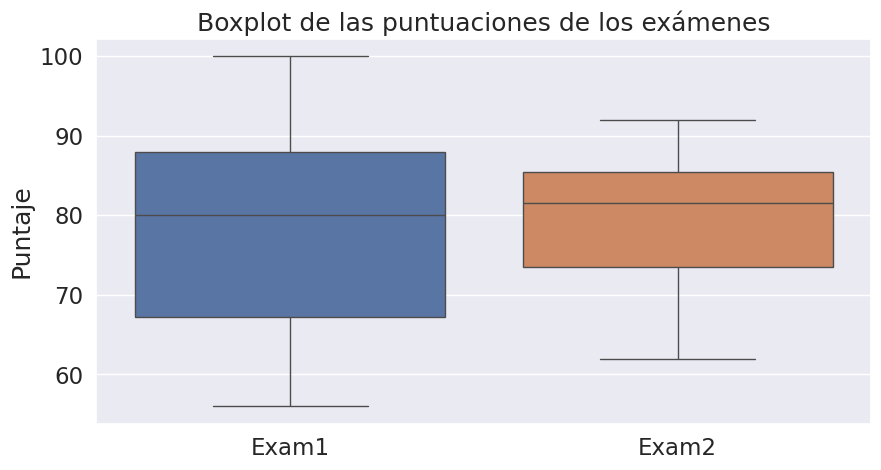

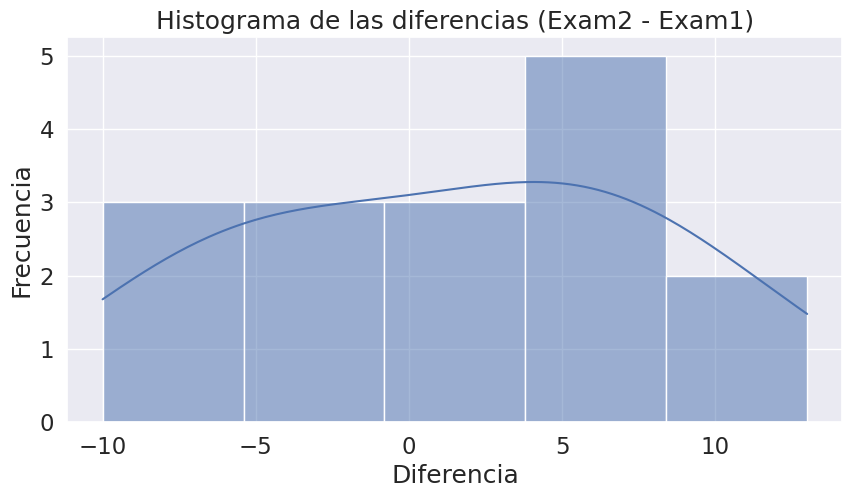

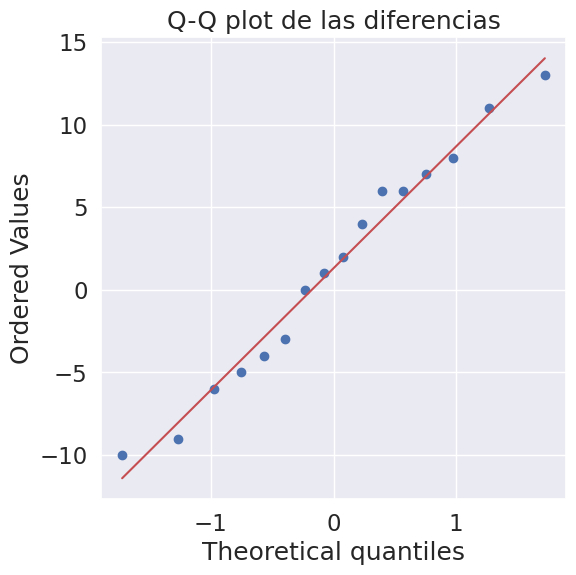

Shapiro-Wilk p-value: 0.7986
Paired t-test t = 0.75, p-value = 0.4650
95% CI de la diferencia de medias: (-2.42, 5.04)


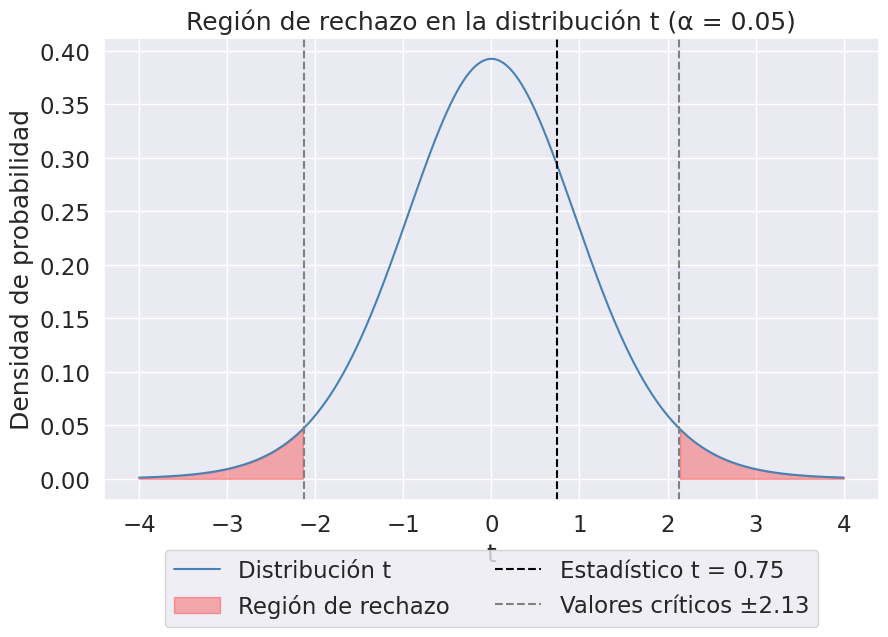

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="darkgrid", font_scale=1.5)

# Datos
data = {
    'Student': ['Bob', 'Nina', 'Tim', 'Kate', 'Alonzo', 'Jose', 'Nikhil', 'Julia', 'Tohru', 'Michael',
                'Jean', 'Indra', 'Susan', 'Allen', 'Paul', 'Edwina'],
    'Exam1': [63, 65, 56, 100, 88, 83, 77, 92, 90, 84, 68, 74, 87, 64, 71, 88],
    'Exam2': [69, 65, 62, 91, 78, 87, 79, 88, 85, 92, 69, 81, 84, 75, 84, 82]
}

df = pd.DataFrame(data)
df['Difference'] = df['Exam2'] - df['Exam1']

# 1. Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Exam1', 'Exam2']])
plt.title('Boxplot de las puntuaciones de los exámenes')
plt.ylabel('Puntaje')
plt.show()

# 2. Histograma de diferencias
plt.figure(figsize=(10, 5))
sns.histplot(df['Difference'], kde=True)
plt.title('Histograma de las diferencias (Exam2 - Exam1)')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.show()

# 3. Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(df['Difference'], dist="norm", plot=plt)
plt.title('Q-Q plot de las diferencias')
plt.show()

# 4. Test de Shapiro-Wilk
shapiro_test = stats.shapiro(df['Difference'])

# 5. T-test pareado
t_test = stats.ttest_rel(df['Exam2'], df['Exam1'])

# 6. Intervalo de confianza para la diferencia de medias
mean_diff = df['Difference'].mean()
sem_diff = stats.sem(df['Difference'])
ci = stats.t.interval(0.95, len(df['Difference'])-1, loc=mean_diff, scale=sem_diff)

# Mostrar resultados
print(f"Shapiro-Wilk p-value: {shapiro_test.pvalue:.4f}")
print(f"Paired t-test t = {t_test.statistic:.2f}, p-value = {t_test.pvalue:.4f}")
print(f"95% CI de la diferencia de medias: ({ci[0]:.2f}, {ci[1]:.2f})")

# 7. Gráfico de región de rechazo
df_test = len(df['Difference']) - 1
alpha = 0.05
t_stat = t_test.statistic
t_crit = stats.t.ppf(1 - alpha / 2, df_test)
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df_test)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución t', color='steelblue')
plt.fill_between(x, y, where=(x <= -t_crit), color='red', alpha=0.3, label='Región de rechazo')
plt.fill_between(x, y, where=(x >= t_crit), color='red', alpha=0.3)
plt.axvline(t_stat, color='black', linestyle='--', label=f'Estadístico t = {t_stat:.2f}')
plt.axvline(-t_crit, color='grey', linestyle='--', label=f'Valores críticos ±{t_crit:.2f}')
plt.axvline(t_crit, color='grey', linestyle='--')
plt.title('Región de rechazo en la distribución t (α = 0.05)')
plt.xlabel('t')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=2)
plt.grid(True)
plt.show()